In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]


In [6]:
cdf.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


In [7]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [8]:
train

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [9]:
test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
12,2014,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
15,2014,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,M6,Z,18.1,12.2,15.4,18,354
20,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230
25,2014,AUDI,A6 QUATTRO,MID-SIZE,2.0,4,AS8,Z,12.0,8.1,10.2,28,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2014,VOLKSWAGEN,GOLF WAGON,STATION WAGON - SMALL,2.5,5,M5,X,11.2,7.3,9.4,30,216
1033,2014,VOLKSWAGEN,GOLF WAGON TDI CLEAN DIESEL,STATION WAGON - SMALL,2.0,4,M6,D,7.9,5.6,6.9,41,186
1052,2014,VOLKSWAGEN,TIGUAN,SUV - SMALL,2.0,4,M6,Z,13.6,9.2,11.6,24,267
1055,2014,VOLKSWAGEN,TOUAREG TDI CLEAN DIESEL,SUV - STANDARD,3.0,6,AS8,D,12.3,8.0,10.4,27,281


In [12]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print(regr.coef_)
regr.intercept_

[[10.68650113  7.73183379  9.44967641]]


array([66.40249118])

In [15]:
coeff=regr.coef_
intercept=regr.intercept_

print('coeff is ',coeff )
print('intercept is ', intercept)

coeff is  [[10.68650113  7.73183379  9.44967641]]
intercept is  [66.40249118]


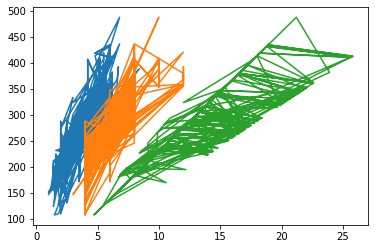

In [21]:
plt.plot(train_x,train_y)
plt.show()